In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Input, GlobalAveragePooling2D, ReLU, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
#load cleaned data
loaded = np.load('mtg_data_balanced.npz', allow_pickle=True)
X_train = loaded['X_train']
Y_train = loaded['Y_train']
X_test = loaded['X_test']
Y_test = loaded['Y_test']

In [4]:
#confirm correct loading and dimensions
print(f'Feature matrix shape: {X.shape}')
print(f'Label array shape: {y.shape}')

Feature matrix shape: (14500, 96, 1400, 1)
Label array shape: (14500, 11)


In [9]:
#convert x to float16 to save RAM
X = X.astype('float16')
y = y.astype('float16')

C:\Users\olive\AppData\Local\Temp\ipykernel_12656\2094963454.py:3: RuntimeWarning: overflow encountered in cast
  y = y.astype('float16')


In [10]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training feature matrix shape: {X_train.shape}')
print(f'Testing feature matrix shape: {X_test.shape}')
print(f'Training label array shape: {y_train.shape}')
print(f'Testing label array shape: {y_test.shape}')

Training feature matrix shape: (11600, 96, 1400, 1)
Testing feature matrix shape: (2900, 96, 1400, 1)
Training label array shape: (11600, 11)
Testing label array shape: (2900, 11)


In [ ]:
model = Sequential([
    Input(shape=(96, 1400, 1)),

    Conv2D(32, (3,3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),
    
    Dense(64, activation='relu'),

    GlobalAveragePooling2D(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train[:, 1:], epochs=5, batch_size=32, validation_data=(X_test, y_test[:, 1:]))

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1793s 5s/step - accuracy: 0.2584 - loss: 2.0438 - val_accuracy: 0.2217 - val_loss: 2.2036
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1361s 4s/step - accuracy: 0.3178 - loss: 1.8893 - val_accuracy: 0.3100 - val_loss: 1.9211
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1278s 4s/step - accuracy: 0.3453 - loss: 1.8272 - val_accuracy: 0.3221 - val_loss: 1.9066
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1178s 3s/step - accuracy: 0.3687 - loss: 1.7808 - val_accuracy: 0.3424 - val_loss: 1.8152
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1179s 3s/step - accuracy: 0.3759 - loss: 1.7547 - val_accuracy: 0.3652 - val_loss: 1.8015


In [26]:
y_test_pred = model.predict(X_test)
test_predicted = np.argmax(y_test_pred, axis=1)
test_true = np.argmax(y_test[:, 1:], axis=1)

91/91 ━━━━━━━━━━━━━━━━━━━━ 70s 760ms/step


In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix for Music Genre Classification')

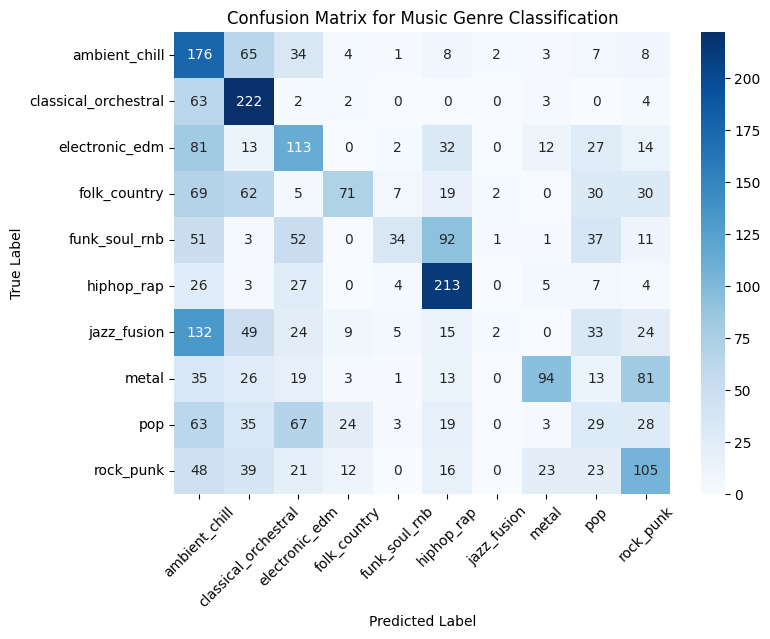

In [27]:
genres = ['ambient_chill',
          'classical_orchestral',
          'electronic_edm',
          'folk_country',
          'funk_soul_rnb',
          'hiphop_rap',
          'jazz_fusion',
          'metal',
          'pop',
          'rock_punk']

cm = confusion_matrix(test_true, test_predicted)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')   
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(len(genres))+0.5, labels=genres, rotation=45)
plt.yticks(ticks=np.arange(len(genres))+0.5, labels=genres, rotation=0)
plt.title('Confusion Matrix for Music Genre Classification')

In [ ]:
#get second most likely predictions, just to see how much error that explains
y_test_pred_sorted = np.argsort(y_test_pred, axis=1)
test_second_predicted = y_test_pred_sorted[:, -2]
#see how accurate the second predictions are
second_accuracy = np.mean(test_second_predicted == test_true)

In [ ]:
#not a significant amount, really
second_accuracy

np.float64(0.1893103448275862)